In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np

import sys
sys.path.append("..")
import encoder_learning_benchmarks.analyze as analyze

In [3]:
data = analyze.load_benchmark_data("../out_multiplication_n_epochs_200.tar.xz")
data = analyze.sort_benchmark_data(data)

Loaded 12800/12800 result files


In [4]:
data_merged = analyze.merge_benchmark_data(data, {"seed": None})

100%|██████████| 12800/12800 [00:02<00:00, 5711.72it/s]


In [5]:
data_flt = analyze.filter_benchmark_data(data_merged, {
    "dataset": {"#name": "multiplication", "skewed": False},
    "decoder_learner": {"#name": "pes"},
    "optimizer": {"#name": "adam"},
    "sequential": False,
    "network": {"initialisation": "nef"},
})

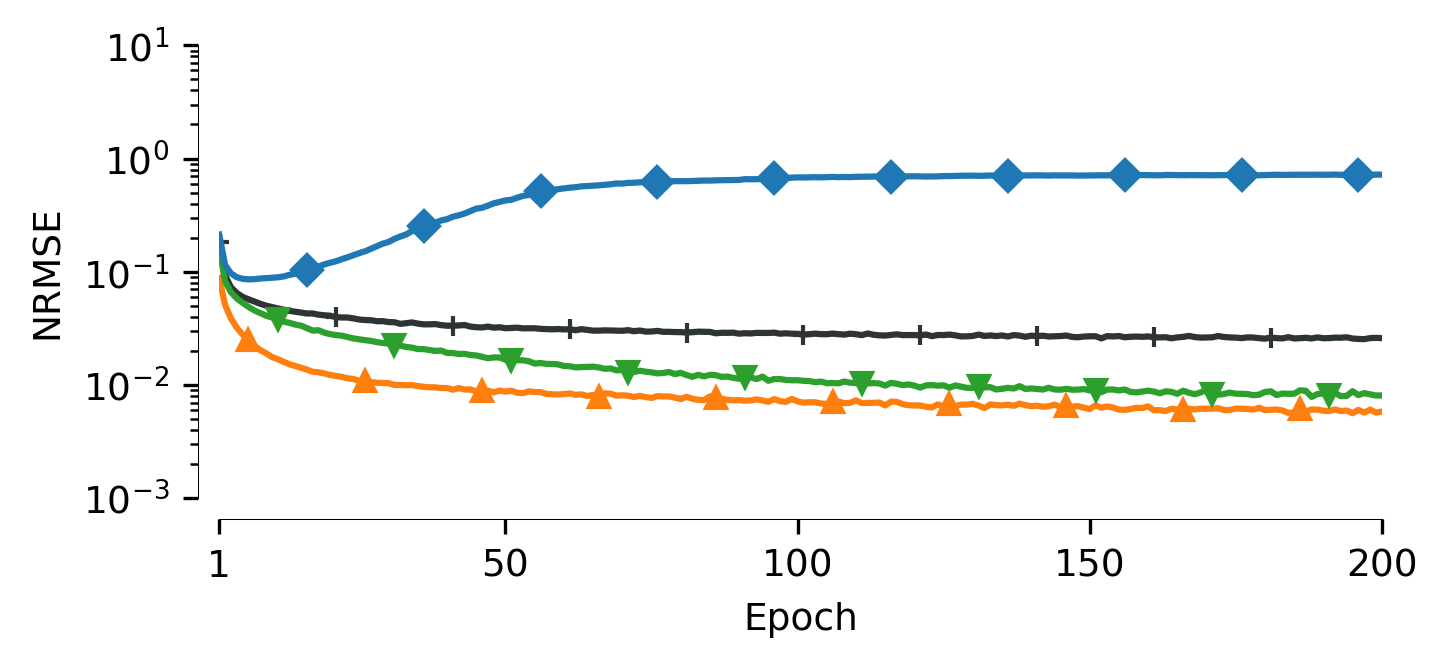

In [28]:
fig, ax, legend_artists, legend_labels = analyze.plot_benchmark_data(data_flt, semilogy=True, plot_median=True, plot_quartiles=False)

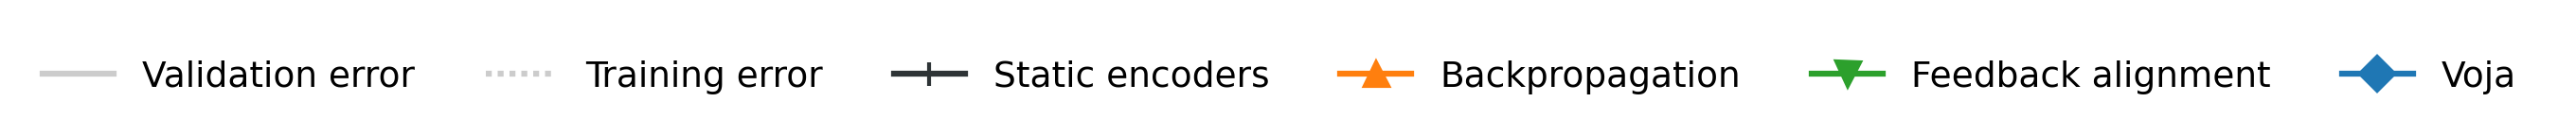

In [29]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(5, 0.2))
artist_ctor = lambda x: mlines.Line2D([0], [0], **x)
ax.legend(list(map(artist_ctor, legend_artists)), legend_labels, ncol=len(legend_artists))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)